In [2]:
import numpy as np
import pandas as pd

date_range = pd.date_range(start='2023-01-01', periods=6, freq='D')
data = pd.Series([200, 220, 250, 230, 210, 240], index=date_range)
weekly_data = data.resample('W').mean()
print(weekly_data)

2023-01-01    200.0
2023-01-08    230.0
Freq: W-SUN, dtype: float64


In [114]:
import numpy as np
import pandas as pd

# Create sample time series data
data = pd.Series([200, 220, 250, 230, 210, 240, 250, 230, 210, 240,200, 220, 250, 230],
                 index=pd.date_range(start='2023-01-01', periods=14, freq='D'))
data.rename('Daily Data', inplace=True)

data.to_frame().T


,2023-01-01,2023-01-02,2023-01-03,2023-01-04,2023-01-05,2023-01-06,2023-01-07,2023-01-08,2023-01-09,2023-01-10,2023-01-11,2023-01-12,2023-01-13,2023-01-14
Daily Data,200,220,250,230,210,240,250,230,210,240,200,220,250,230


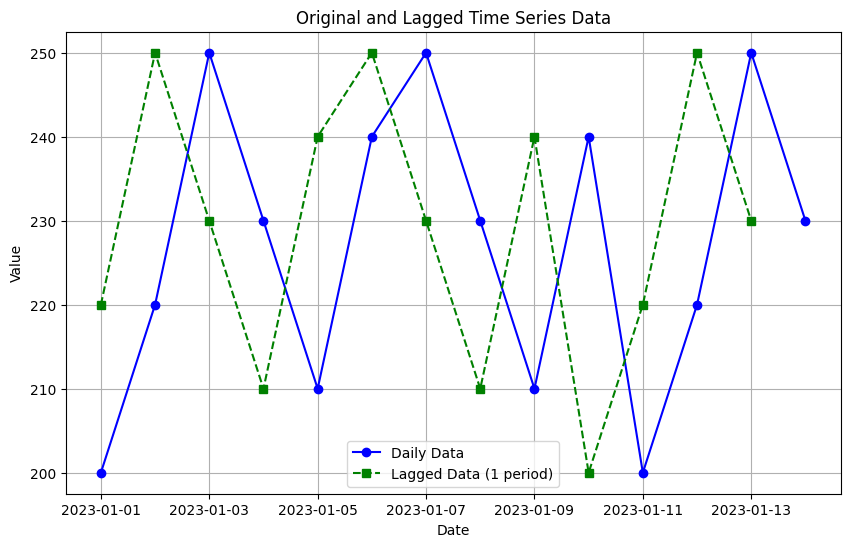

In [100]:
import matplotlib.pyplot as plt

# Lag the data by one period
lagged_data = data.shift(-1)

# Plot the original and lagged data
plt.figure(figsize=(10, 6))
plt.plot(data.index, data.values, label='Daily Data', marker='o',color='b')
plt.plot(lagged_data, label='Lagged Data (1 period)', marker='s',color='g', linestyle='--')
# plt.plot(lagged_data, label='Lagged Data (1 period)')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Original and Lagged Time Series Data')
plt.legend()
plt.grid(True)
plt.show()


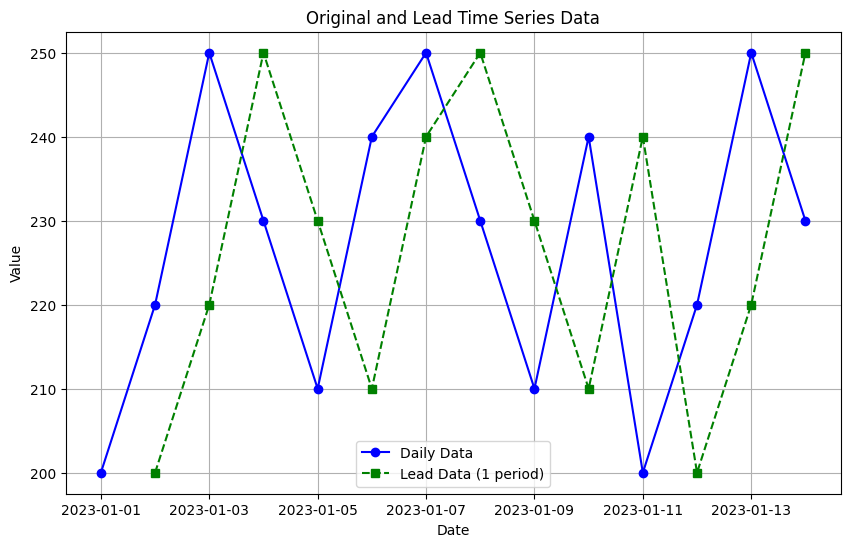

In [112]:
import matplotlib.pyplot as plt

# Lag the data by one period
lagged_data = data.shift(1)

# Plot the original and lagged data
plt.figure(figsize=(10, 6))
plt.plot(data.index, data.values, label='Daily Data', marker='o',color='b')
plt.plot(lagged_data, label='Lead Data (1 period)', marker='s',color='g', linestyle='--')
# plt.plot(lagged_data, label='Lagged Data (1 period)')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Original and Lead Time Series Data')
plt.legend()
plt.grid(True)
plt.show()


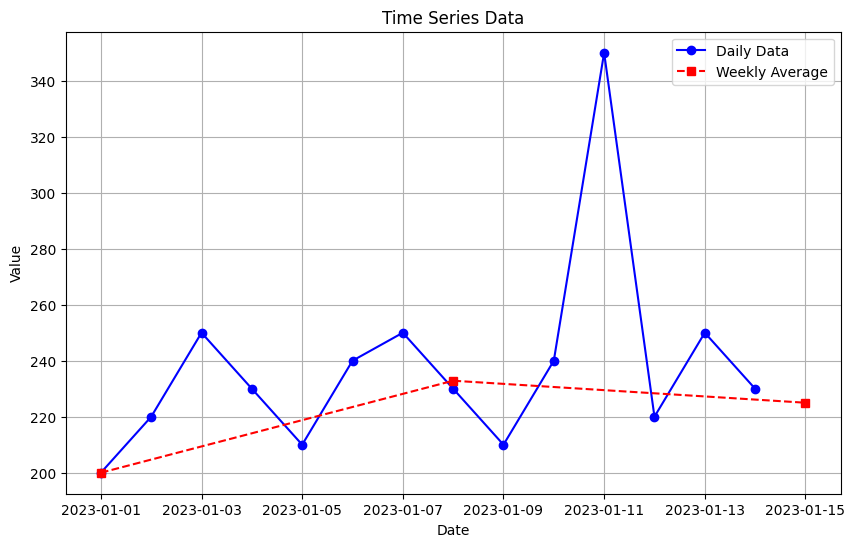

In [69]:
import matplotlib.pyplot as plt

# Assuming 'data' and 'weekly_data' are already defined as in your provided code.

plt.figure(figsize=(10, 6))
plt.plot(data.index, data.values, label='Daily Data', marker='o',color='b')
plt.plot(weekly_data.index, weekly_data.values, label='Weekly Average', marker='s', linestyle='--',color='r')
# plt.plot(smooth.index, smooth.values, label='Smoothing', marker='+', linestyle='-',color='g')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Time Series Data')
plt.legend()
plt.grid(True)
plt.show()


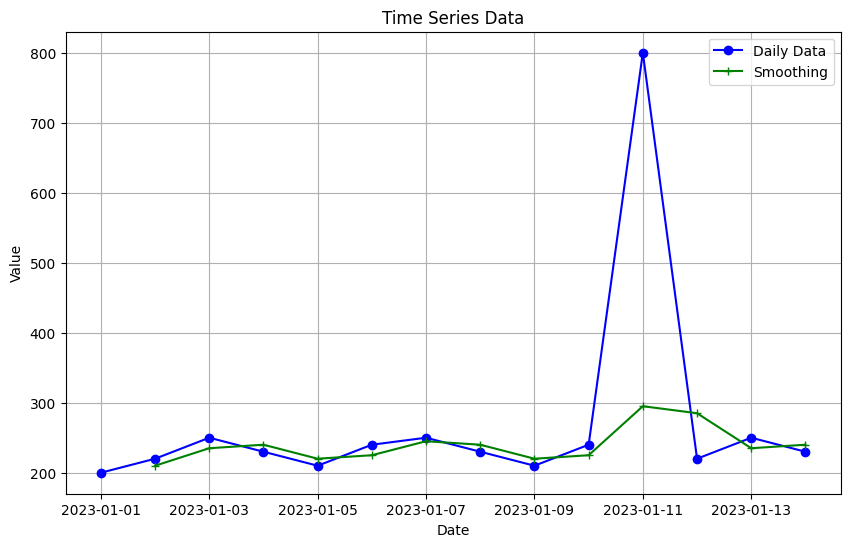

In [75]:
import matplotlib.pyplot as plt

# Assuming 'data' and 'weekly_data' are already defined as in your provided code.

plt.figure(figsize=(10, 6))
plt.plot(data.index, data.values, label='Daily Data', marker='o',color='b')
# plt.plot(weekly_data.index, weekly_data.values, label='Weekly Average', marker='s', linestyle='--',color='r')
plt.plot(smooth.index, smooth.values, label='Smoothing', marker='+', linestyle='-',color='g')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Time Series Data')
plt.legend()
plt.grid(True)
plt.show()


In [55]:
smooth.fillna(200,inplace=True)

In [72]:
smooth

,Daily Data
2023-01-01,NaN
2023-01-02,210.0
2023-01-03,235.0
2023-01-04,240.0
2023-01-05,220.0
2023-01-06,225.0
2023-01-07,245.0
2023-01-08,240.0
2023-01-09,220.0
2023-01-10,225.0


anomaly 2023-01-11    800
Freq: D, Name: Daily Data, dtype: int64


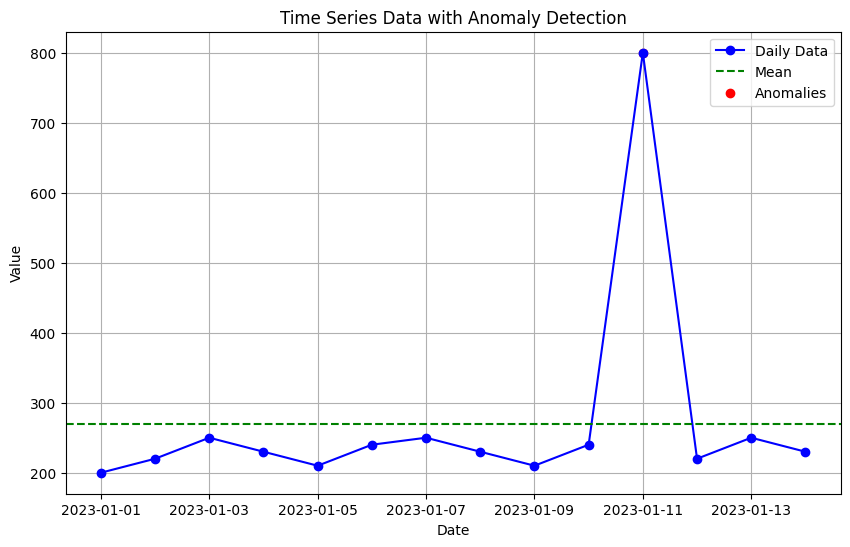

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Create sample time series data
data = pd.Series([200, 220, 250, 230, 210, 240, 250, 230, 210, 240, 800, 220, 250, 230],
                 index=pd.date_range(start='2023-01-01', periods=14, freq='D'))
data.rename('Daily Data', inplace=True)

# Calculate mean and standard deviation
mean = data.mean()
std = data.std()

# Calculate z-scores
z_scores = (data - mean) / std

# Identify anomalies as points with z-score greater than 2 or less than -2
anomalies = data[np.abs(z_scores) > 2]
print('anomaly',anomalies)

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(data, label='Daily Data', marker='o', linestyle='-', color='blue')
# plt.scatter(anomalies.index, anomalies, color='red', marker='o', label='Anomalies')
plt.axhline(mean, color='green', linestyle='--', label='Mean')
plt.scatter(anomalies.index, anomalies, color='red', marker='o', label='Anomalies')
plt.title('Time Series Data with Anomaly Detection')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid()
plt.show()


Anomalies Detected: 2023-01-11    800
Freq: D, Name: Daily Data, dtype: int64


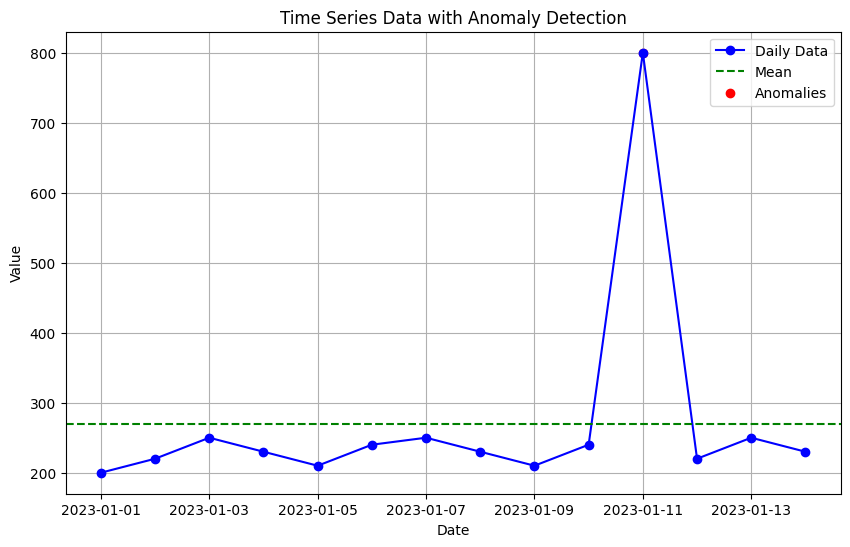

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Create sample time series data
data = pd.Series([200, 220, 250, 230, 210, 240, 250, 230, 210, 240, 800, 220, 250, 230],
                 index=pd.date_range(start='2023-01-01', periods=14, freq='D'))
data.rename('Daily Data', inplace=True)

# Calculate mean and standard deviation
mean = data.mean()
std = data.std()

# Calculate z-scores
z_scores = (data - mean) / std

# Identify anomalies as points with z-score greater than 2 or less than -2
anomalies = data[np.abs(z_scores) > 2]
print('Anomalies Detected:', anomalies)

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(data, label='Daily Data', marker='o', linestyle='-', color='blue')
plt.axhline(mean, color='green', linestyle='--', label='Mean')

# Overlay anomalies as red dots
if not anomalies.empty:
    plt.scatter(anomalies.index, anomalies, color='red', marker='o', label='Anomalies')

plt.title('Time Series Data with Anomaly Detection')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid()
plt.show()


Anomaly Detected: 2023-01-11    800
Freq: D, Name: Daily Data, dtype: int64


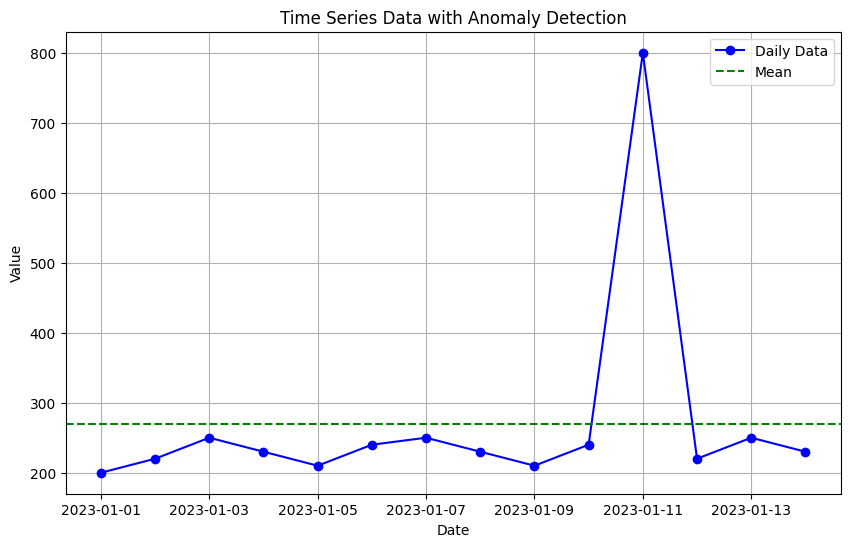

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Create sample time series data
data = pd.Series([200, 220, 250, 230, 210, 240, 250, 230, 210, 240, 800, 220, 250, 230],
                 index=pd.date_range(start='2023-01-01', periods=14, freq='D'))
data.rename('Daily Data', inplace=True)

# Calculate mean and standard deviation
mean = data.mean()
std = data.std()

# Calculate z-scores
z_scores = (data - mean) / std

# Identify anomalies as points with z-score greater than 2 or less than -2
anomalies = data[np.abs(z_scores) > 2]
print('Anomaly Detected:', anomalies)

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(data, label='Daily Data', marker='o', linestyle='-', color='blue')
plt.axhline(mean, color='green', linestyle='--', label='Mean')

# # Overlay anomaly as a red dot
# for index, value in anomalies.items():
#     plt.scatter(index, value, color='grey', marker='o', label='Anomaly')

# Avoid duplicate legend entries for anomaly
handles, labels = plt.gca().get_legend_handles_labels()
unique_labels = dict(zip(labels, handles))
plt.legend(unique_labels.values(), unique_labels.keys())

plt.title('Time Series Data with Anomaly Detection')
plt.xlabel('Date')
plt.ylabel('Value')
plt.grid()
plt.show()


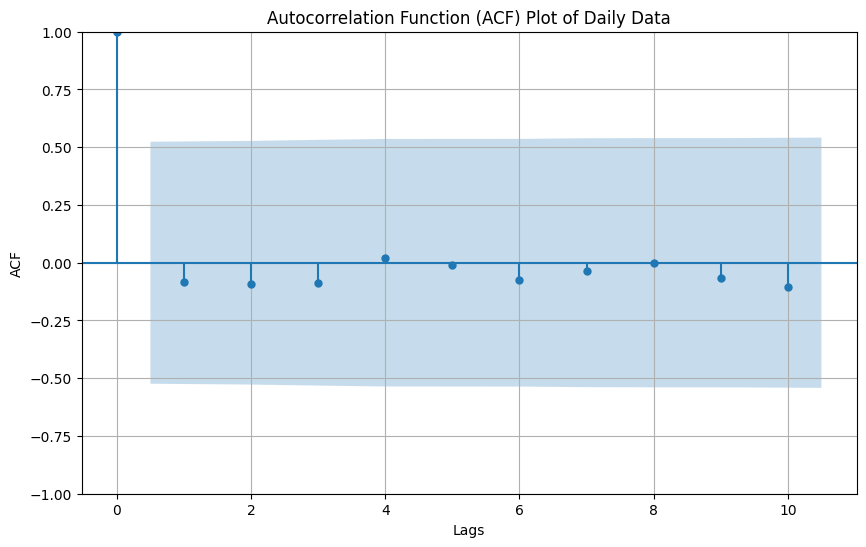

In [108]:
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'data' is your time series data (as defined in your previous code)
# Example data (replace with your actual data)
data = pd.Series([200, 220, 250, 230, 210, 240, 250, 230, 210, 240, 800, 220, 250, 230],
                 index=pd.date_range(start='2023-01-01', periods=14, freq='D'))
data.rename('Daily Data', inplace=True)


fig, ax = plt.subplots(figsize=(10, 6))  # Adjust figure size as needed

plot_acf(data, lags=10, ax=ax) # Plot ACF with specified lags
plt.title('Autocorrelation Function (ACF) Plot of Daily Data')
plt.xlabel('Lags')
plt.ylabel('ACF')
plt.grid(True)
plt.show()


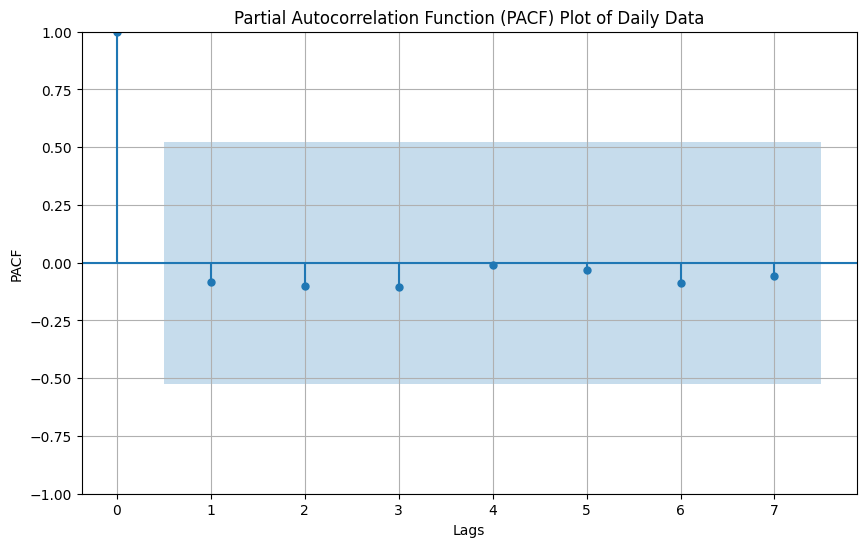

In [106]:
from statsmodels.graphics.tsaplots import plot_pacf

# Assuming 'data' is your time series data (as defined in your previous code)
# Example data (replace with your actual data)
data = pd.Series([200, 220, 250, 230, 210, 240, 250, 230, 210, 240, 800, 220, 250, 230],
                 index=pd.date_range(start='2023-01-01', periods=14, freq='D'))
data.rename('Daily Data', inplace=True)


fig, ax = plt.subplots(figsize=(10, 6))  # Adjust figure size as needed

plot_pacf(data, lags=7, ax=ax) # Plot PACF with specified lags
plt.title('Partial Autocorrelation Function (PACF) Plot of Daily Data')
plt.xlabel('Lags')
plt.ylabel('PACF')
plt.grid(True)
plt.show()


<ipython-input-115-6dd2bfcc37a2>:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(data.index[i], data[i] + 5, str(data[i]), ha='center', color='blue')
<ipython-input-115-6dd2bfcc37a2>:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if not pd.isna(data_lag1[i]):
<ipython-input-115-6dd2bfcc37a2>:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if not pd.isna(data_lead1[i]):
<ipython-input-115-6dd2bfcc37a2>:20: FutureWarni

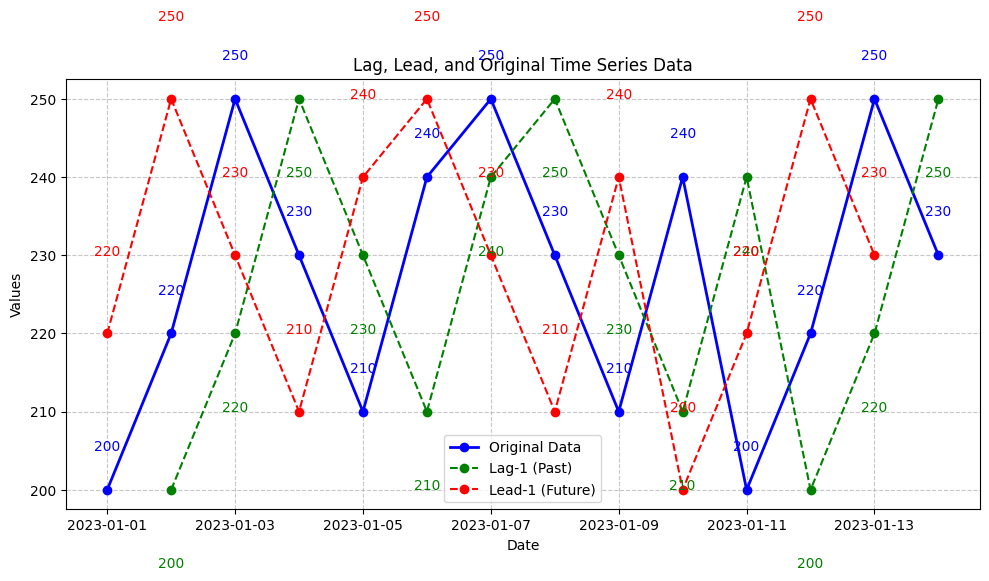

In [115]:
import matplotlib.pyplot as plt
import pandas as pd

# Create lagged and lead series
data_lag1 = data.shift(1)
data_lead1 = data.shift(-1)

# Plot original, lag, and lead series
plt.figure(figsize=(10, 6))
plt.plot(data, marker='o', label='Original Data', linestyle='-', linewidth=2, color='blue')
plt.plot(data_lag1, marker='o', label='Lag-1 (Past)', linestyle='--', color='green')
plt.plot(data_lead1, marker='o', label='Lead-1 (Future)', linestyle='--', color='red')

# Adding annotations
for i in range(len(data)):
    plt.text(data.index[i], data[i] + 5, str(data[i]), ha='center', color='blue')
    if not pd.isna(data_lag1[i]):
        plt.text(data_lag1.index[i], data_lag1[i] - 10, str(int(data_lag1[i])), ha='center', color='green')
    if not pd.isna(data_lead1[i]):
        plt.text(data_lead1.index[i], data_lead1[i] + 10, str(int(data_lead1[i])), ha='center', color='red')

# Customize plot
plt.title('Lag, Lead, and Original Time Series Data')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

<ipython-input-117-250fb42fe6bd>:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(data.index[i], data[i] + 5, str(data[i]), ha='center', color='blue')
<ipython-input-117-250fb42fe6bd>:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if not pd.isna(data_lag1[i]):
<ipython-input-117-250fb42fe6bd>:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if not pd.isna(data_lead1[i]):
<ipython-input-117-250fb42fe6bd>:20: FutureWarni

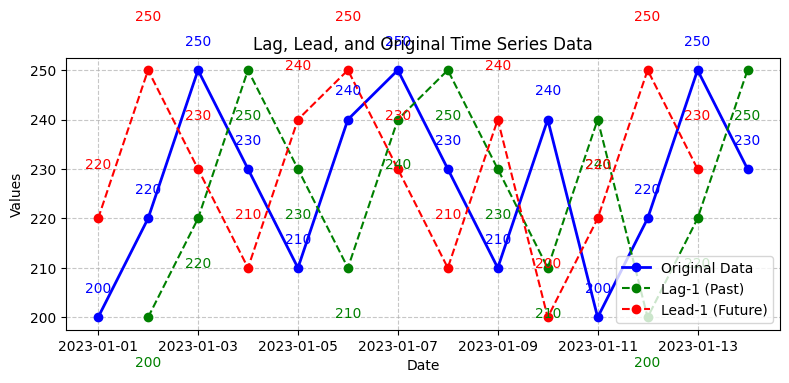

In [117]:
import matplotlib.pyplot as plt
import pandas as pd

# Create lagged and lead series
data_lag1 = data.shift(1)
data_lead1 = data.shift(-1)

# Plot original, lag, and lead series
plt.figure(figsize=(8, 4))
plt.plot(data, marker='o', label='Original Data', linestyle='-', linewidth=2, color='blue')
plt.plot(data_lag1, marker='o', label='Lag-1 (Past)', linestyle='--', color='green')
plt.plot(data_lead1, marker='o', label='Lead-1 (Future)', linestyle='--', color='red')

# Adding annotations
for i in range(len(data)):
    plt.text(data.index[i], data[i] + 5, str(data[i]), ha='center', color='blue')
    if not pd.isna(data_lag1[i]):
        plt.text(data_lag1.index[i], data_lag1[i] - 10, str(int(data_lag1[i])), ha='center', color='green')
    if not pd.isna(data_lead1[i]):
        plt.text(data_lead1.index[i], data_lead1[i] + 10, str(int(data_lead1[i])), ha='center', color='red')

# Customize plot
plt.title('Lag, Lead, and Original Time Series Data')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()